In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

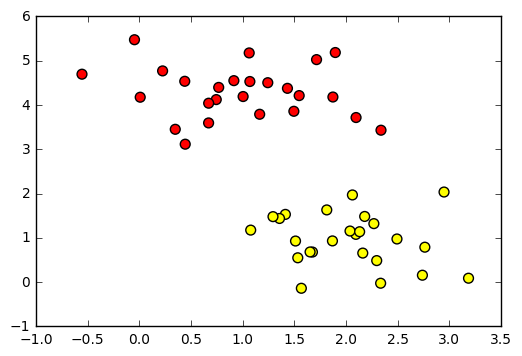

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples = 50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

(-1, 3.5)

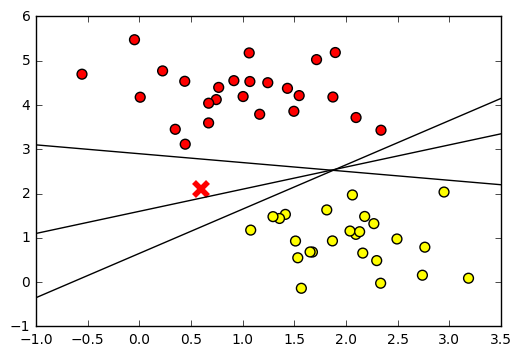

In [3]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=4,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit +b,'-k')
    
plt.xlim(-1,3.5)

(-1, 3.5)

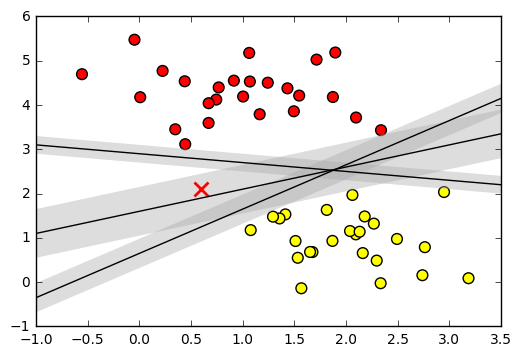

In [4]:
plt.figure(3)
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c = y,s = 60 ,cmap = 'autumn')
plt.plot([0.6],[2.1],'x',color = 'red',markeredgewidth = 2,markersize = 10)##画了一个X点
 
##以X点画几条切分线
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    ##m为斜率
    yfit = m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit - d,yfit + d,edgecolor = 'none',color = '#AAAAAA',alpha = 0.4)
plt.xlim(-1,3.5)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


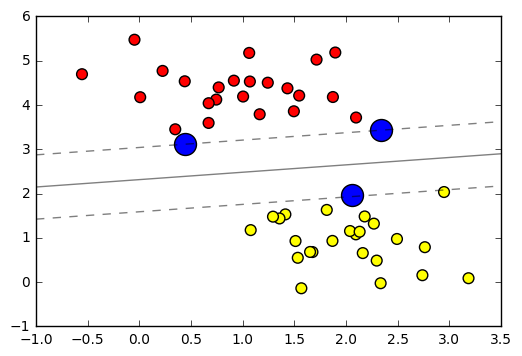

In [5]:
'''构造支持向量机模型的基本思想：首先找到距离决策边界最近的样本点，然后使该点到该边界的距离越远越好'''
from sklearn.svm import SVC  ###支持向量机的一个分类器
model = SVC(kernel='linear')##核函数选用线性分类
###开始训练一个基本的SVM
model.fit(X,y)
 
 
# 绘图函数，边界上的点才是支持向量，系数不等于0，非边界上的系数值等于0.
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
    # 画决策边界和边缘
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
 
    # 画支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=250, linewidth=1, facecolors='b')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
 
plt.figure(4)
plt.scatter(X[:,0],X[:,1],c = y,s = 60 ,cmap = 'autumn')
plot_svc_decision_function(model)
 
###输出支持向量的坐标：
print(model.support_vectors_)
# [[0.44359863 3.11530945]
#  [2.33812285 3.43116792]
#  [2.06156753 1.96918596]]

D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


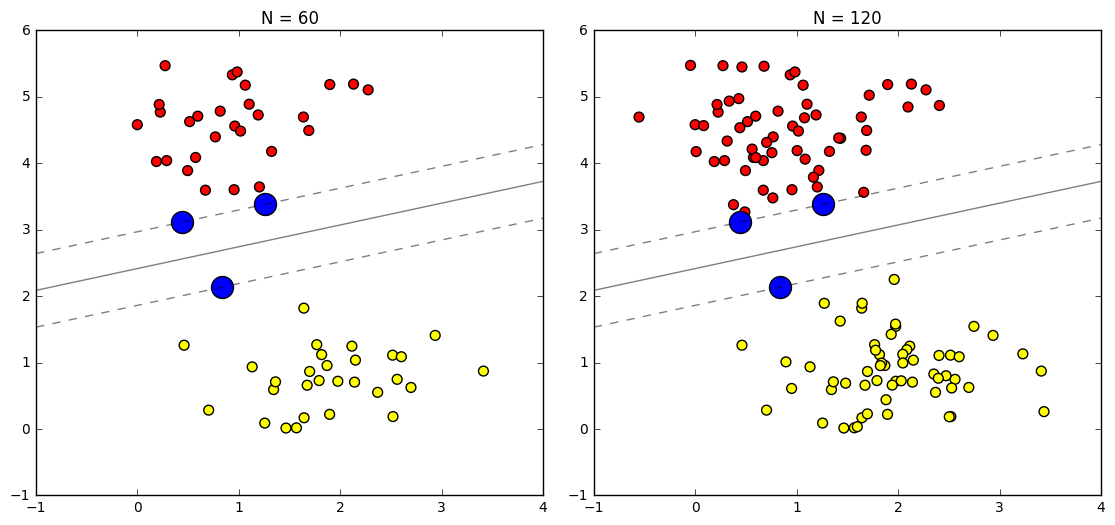

In [6]:
'''改变数据的个数【60，120】，只要支持向量不变，决策边界就不改变'''
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
 
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
 
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


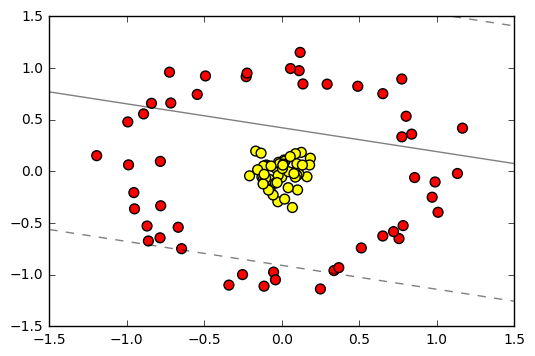

In [7]:
###重新构造数据集
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)###圆环型的数据集
 
clf = SVC(kernel='linear').fit(X, y)##先采用线性的SVM
plt.figure(6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

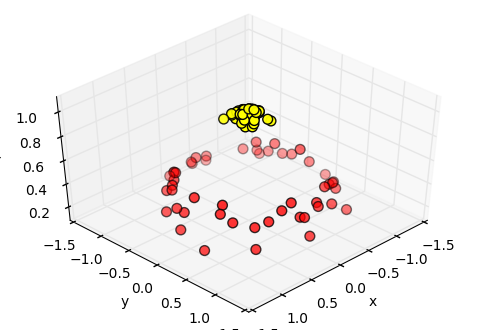

In [15]:
#加入了新的维度r
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
plt.figure(7)
plot_3D(elev=45, azim=45, X=X, y=y)

In [17]:
np.exp(1)

2.718281828459045

D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


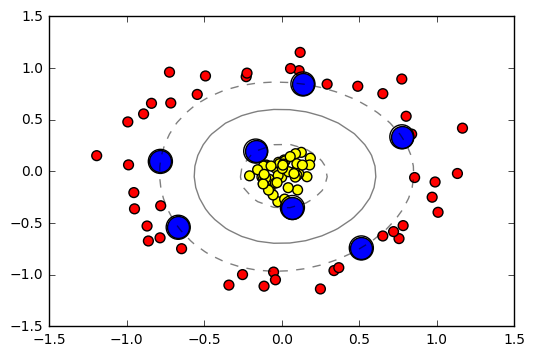

In [18]:
#加入径向基函数（就是高斯核函数或者rbf核函数），都是高斯变换
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
###非线性划分展示
plt.figure(8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')#s是大小

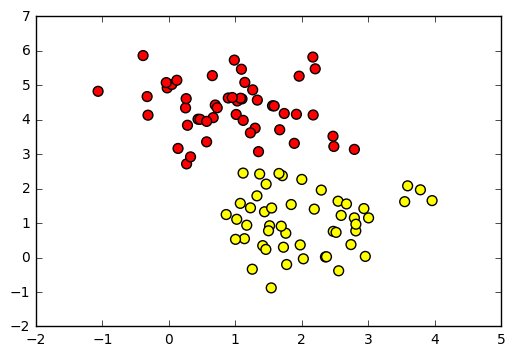

In [19]:
###重新随机一些数据，使离散程度更大一些
plt.figure(9)
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


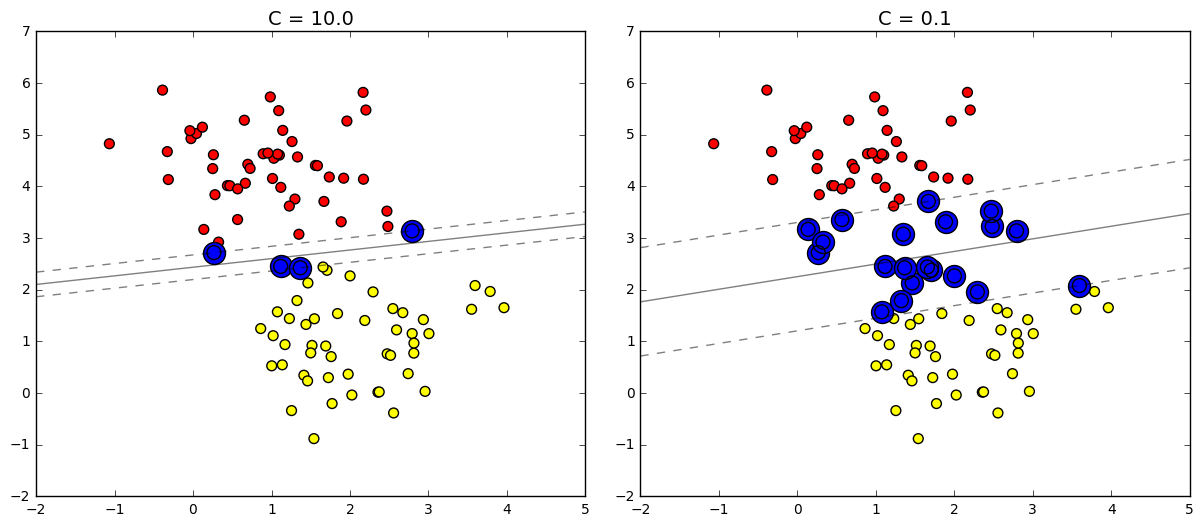

In [23]:
###改变C参数的大小对结果的影响，可以看到，C太大划分更严格，泛化能力更弱，适合要求
###C小，要求越放松。
###通常用交叉验证来评判哪个效果好，就取哪个C
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
 
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
for axi, C in zip(ax, [10.0, 0.1]):##分别取得ax，10；ax，0.1赋给axi，C然后执行循环。
    model1 = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model1, axi)
    axi.scatter(model1.support_vectors_[:, 0],
                model1.support_vectors_[:, 1],
                s=100, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


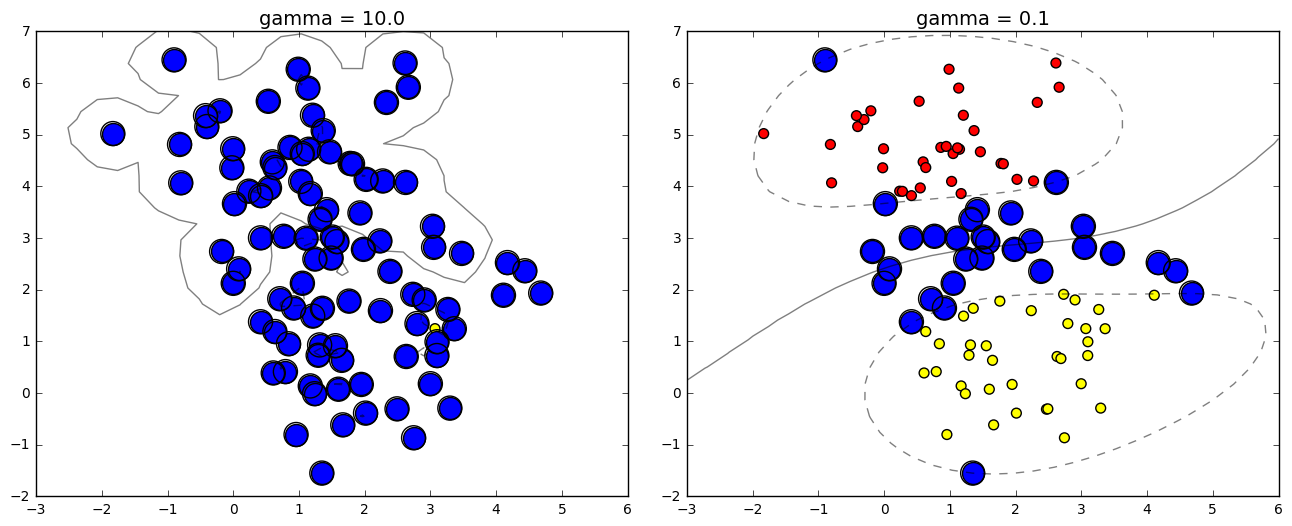

In [24]:
#####探究高斯核函数中的gamma系数：
#####                控制模型的一些复杂程度，
#####                越大的gamma值，表示映射的维度越高，模型越复杂，可能会让所有点都成了支持向量
#####                越小，模型越精简，结果更平稳。所以精度并不能直接说明模型好坏
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.1)
 
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)